<a href="https://colab.research.google.com/github/o-bissing/TF_Udemy/blob/main/CNN_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

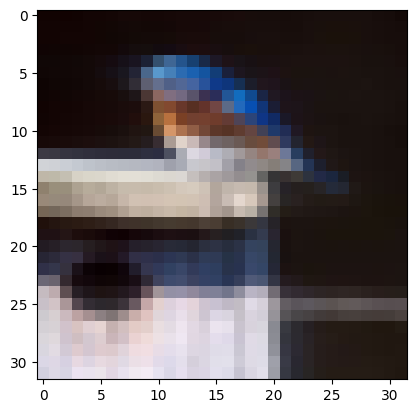

In [12]:
plt.imshow(x_train[13])

In [13]:
x_train[0].max()

255

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

# Building the model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4859 - accuracy: 0.4634 - val_loss: 1.2803 - val_accuracy: 0.5401
Epoch 2/15
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1616 - accuracy: 0.5914 - val_loss: 1.1072 - val_accuracy: 0.6126
Epoch 3/15
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0201 - accuracy: 0.6415 - val_loss: 1.0236 - val_accuracy: 0.6374
Epoch 4/15
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9157 - accuracy: 0.6797 - val_loss: 1.0031 - val_accuracy: 0.6498
Epoch 5/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8295 - accuracy: 0.7082 - val_loss: 0.9474 - val_accuracy: 0.6727
Epoch 6/15
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7530 - accuracy: 0.7374 - val_loss: 0.9605 - val_accuracy: 0.6701
Epoch 7/15
1563/1563 [==============================] - 92s 59ms/step - loss: 0.6740 - accuracy: 0.7648 - val_loss: 0.9567 -

# Model evaluation

In [24]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.485917,0.46344,1.280315,0.5401
1,1.161627,0.59136,1.107229,0.6126
2,1.020053,0.64148,1.023594,0.6374
3,0.915671,0.67966,1.003059,0.6498
4,0.829494,0.70822,0.947445,0.6727
5,0.753040,0.73744,0.960546,0.6701
6,0.674023,0.76478,0.956663,0.6819


<Axes: >

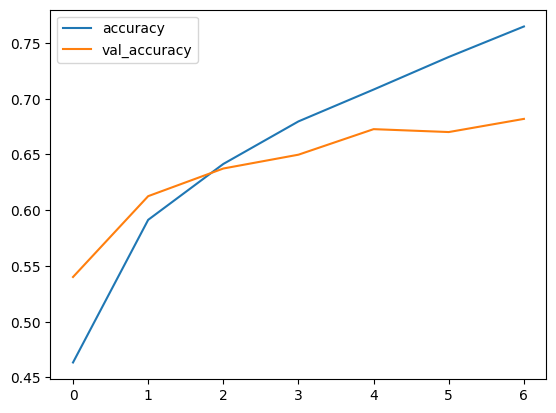

In [25]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

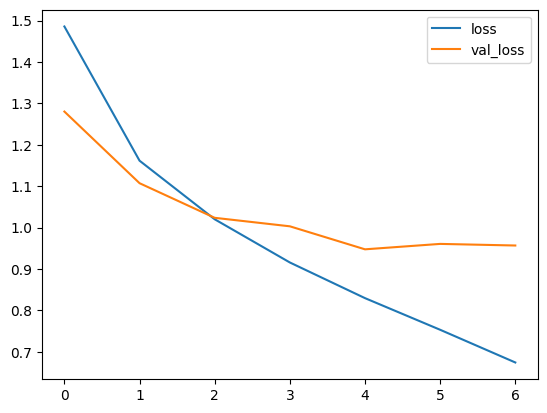

In [26]:
metrics[['loss','val_loss']].plot()

In [28]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9566628932952881, 0.6819000244140625]

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
preds_prob = model.predict(x_test)
predictions = np.argmax(preds_prob, axis=1)

313/313 [==============================] - 4s 11ms/step


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.83      0.78      0.80      1000
           2       0.55      0.61      0.58      1000
           3       0.49      0.50      0.49      1000
           4       0.65      0.61      0.63      1000
           5       0.58      0.56      0.57      1000
           6       0.77      0.74      0.75      1000
           7       0.72      0.72      0.72      1000
           8       0.75      0.82      0.78      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [31]:
confusion_matrix(y_test,predictions)

array([[703,  25,  67,  18,  22,   6,  12,  15,  92,  40],
       [ 21, 776,  11,   9,   8,   2,  11,   3,  48, 111],
       [ 53,   3, 614,  68,  81,  78,  43,  30,  17,  13],
       [ 21,  13,  89, 497,  64, 175,  66,  37,  26,  12],
       [ 13,   1,  97,  62, 606,  41,  51, 107,  18,   4],
       [ 18,   9,  76, 188,  47, 563,  24,  60,  10,   5],
       [  6,   4,  72,  83,  37,  24, 740,  15,   9,  10],
       [ 11,   2,  55,  49,  54,  71,   5, 721,   9,  23],
       [ 63,  24,  18,  19,   9,   9,   8,   5, 817,  28],
       [ 22,  76,  19,  19,   5,   9,   7,  12,  49, 782]])

In [32]:
import seaborn as sns

<Axes: >

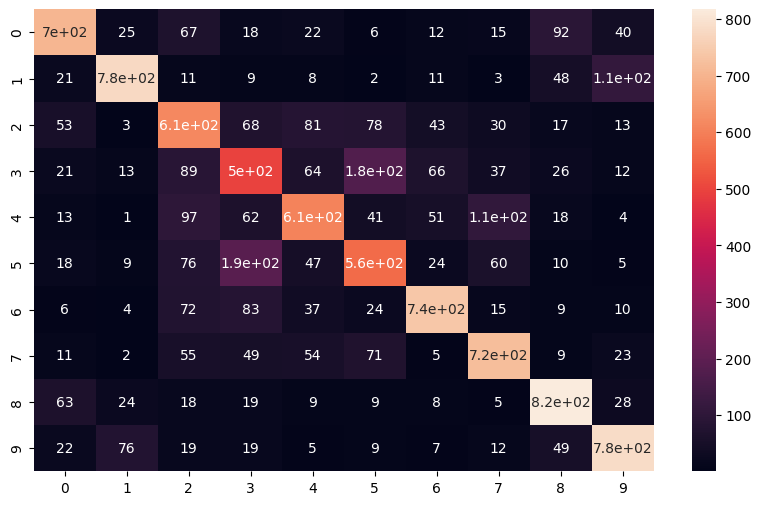

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [41]:
my_image = x_test[16]
my_image

array([[[0.37254902, 0.29803922, 0.30588235],
        [0.36078431, 0.30196078, 0.30588235],
        [0.34901961, 0.30196078, 0.30196078],
        ...,
        [0.11764706, 0.10980392, 0.14901961],
        [0.68627451, 0.71764706, 0.74901961],
        [0.88235294, 0.91764706, 0.94117647]],

       [[0.35294118, 0.27843137, 0.28627451],
        [0.3372549 , 0.28235294, 0.28235294],
        [0.3254902 , 0.27843137, 0.27843137],
        ...,
        [0.        , 0.        , 0.05098039],
        [0.23529412, 0.24705882, 0.30980392],
        [0.64705882, 0.67058824, 0.74117647]],

       [[0.34509804, 0.27058824, 0.27843137],
        [0.32941176, 0.2745098 , 0.2745098 ],
        [0.32156863, 0.2745098 , 0.2745098 ],
        ...,
        [0.01960784, 0.        , 0.04705882],
        [0.09411765, 0.10196078, 0.18823529],
        [0.49803922, 0.54509804, 0.64705882]],

       ...,

       [[0.79607843, 0.69019608, 0.63137255],
        [0.83529412, 0.68627451, 0.61176471],
        [0.79215686, 0

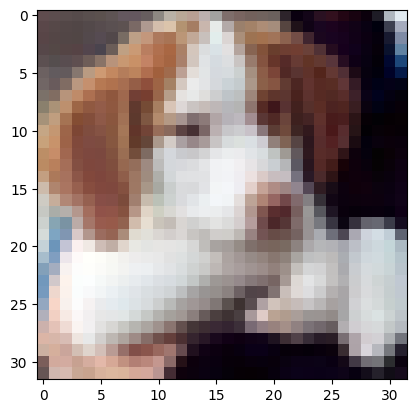

In [42]:
plt.imshow(my_image)

In [43]:
y_test[16]

array([5], dtype=uint8)

In [44]:
preds_prob = model.predict(my_image.reshape(1,32,32,3)) # This will output probabilities
predictions = np.argmax(preds_prob, axis=1) # Converts the probabilities to the particular class. Use this for multi-class classification.
predictions

1/1 [==============================] - 0s 20ms/step


array([5])